In [52]:
#se importan las librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
from sklearn.metrics import confusion_matrix
import skimage.io as io
import os
from skimage.color import rgb2gray
from scipy.io import loadmat, savemat
from scipy.signal import correlate2d
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [2]:
#Se obtienen las direcciones del sistema para el workspace actual
current_directory = os.getcwd()
# se cargan las rutas de las imagenes de entrenamiento y validación
train_paths = glob.glob(os.path.join(current_directory,'train','*.jpg'))
valid_paths = glob.glob(os.path.join(current_directory,'val','*.jpg'))

In [57]:
valid_paths

['C:\\Users\\GABRIELA\\Documents\\Procesamientoimagenes\\dataset_Lab7\\val\\1_3.jpg',
 'C:\\Users\\GABRIELA\\Documents\\Procesamientoimagenes\\dataset_Lab7\\val\\2_3.jpg',
 'C:\\Users\\GABRIELA\\Documents\\Procesamientoimagenes\\dataset_Lab7\\val\\3_3.jpg']

In [3]:
# se leen las imagenes alojadas en las rutas especificadas
imagenes_train = []
for file_train in train_paths:
    img_train = io.imread(file_train)
    imagenes_train.append(img_train)

imagenes_valid = []
for file_valid in valid_paths:
    img_valid = plt.imread(file_valid)
    imagenes_valid.append(img_valid)

In [59]:
len(imagenes_valid)

3

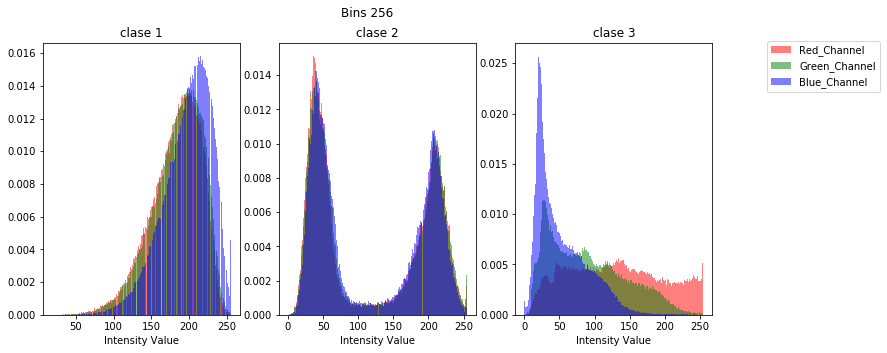

In [4]:
# se obtienen los histogramas para cada canal de cada imagen 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

fig.suptitle('Bins 256')
ax1.hist(imagenes_train[0][:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5,density=True )# se grafica el canal rojo
ax1.hist(imagenes_train[0][:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5,density=True )# se grafica el canal verde
ax1.hist(imagenes_train[0][:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True )# se grafica el canal azul
ax1.set_xlabel('Intensity Value')
ax1.set_title('clase 1')



ax2.hist(imagenes_train[2][:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5,density=True )
ax2.hist(imagenes_train[2][:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5,density=True )
ax2.hist(imagenes_train[2][:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True )
ax2.set_xlabel('Intensity Value')
ax2.set_title('clase 2')



ax3.hist(imagenes_train[4][:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5,density=True )
ax3.hist(imagenes_train[4][:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5,density=True )
ax3.hist(imagenes_train[4][:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True )
ax3.set_xlabel('Intensity Value')
ax3.set_title('clase 3')


fig.legend( ['Red_Channel', 'Green_Channel', 'Blue_Channel'], loc = 'upper right', bbox_to_anchor = (0.1,-0.1,1,1),
            bbox_transform = plt.gcf().transFigure )
plt.show()

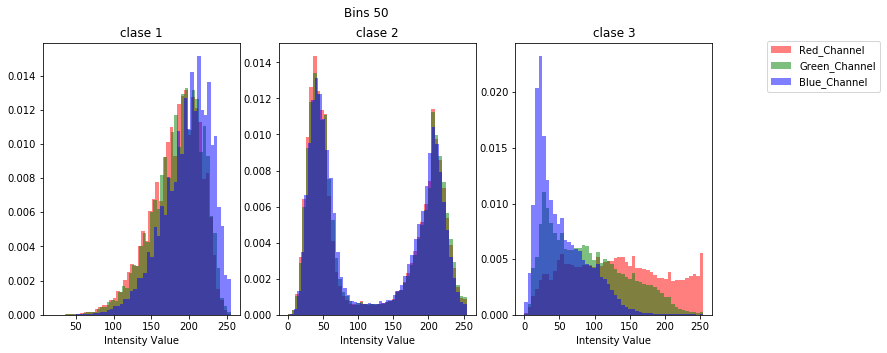

In [5]:
# se obtienen los histogramas para cada canal de cada imagen 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

fig.suptitle('Bins 50')
ax1.hist(imagenes_train[0][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax1.hist(imagenes_train[0][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax1.hist(imagenes_train[0][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax1.set_xlabel('Intensity Value')
ax1.set_title('clase 1')



ax2.hist(imagenes_train[2][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax2.hist(imagenes_train[2][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax2.hist(imagenes_train[2][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax2.set_xlabel('Intensity Value')
ax2.set_title('clase 2')



ax3.hist(imagenes_train[4][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax3.hist(imagenes_train[4][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax3.hist(imagenes_train[4][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax3.set_xlabel('Intensity Value')
ax3.set_title('clase 3')


fig.legend( ['Red_Channel', 'Green_Channel', 'Blue_Channel'], loc = 'upper right', bbox_to_anchor = (0.1,-0.1,1,1),
            bbox_transform = plt.gcf().transFigure )
plt.show()

In [6]:
# se obtienen y se concatenan los histogranas de cada canal para cada imagen
def get_hist(set_img, num_bins):
    histograms = []
    for img in set_img:
        (R_channel, _) = np.histogram(img[:,:,0].ravel(), bins = num_bins)
        (G_channel, _) = np.histogram(img[:,:,1].ravel(), bins = num_bins)
        (B_channel, _) = np.histogram(img[:,:,2].ravel(), bins = num_bins)
        hist = np.concatenate([R_channel,G_channel,B_channel], axis=0)# se concatenan los histogramas de cada canal
        hist = hist/img.shape[0]*img.shape[1]# se normaliza el histograma
        hist = hist.astype("int")
        histograms.append(hist)# se guarda en la lista que contiene los histograma concatenados para cada imagen
    return np.array(histograms)

hist_train_2 = get_hist(imagenes_train, 100)# se obtiene la lista de histogramas para las imagenes de entrenamiento
hist_test_2 = get_hist(imagenes_valid, 100)# se obtiene la lista de histogramas para las imagenes de validación

In [60]:
hist_test_2.shape

(3, 300)

In [7]:
np.random.seed(1) # se establece la semilla de aleatoriedad para permitir asegurar la replica del proceso computacional
kmeans256 = KMeans(n_clusters=3, random_state=0).fit(hist_train_2)# se ajusta el modelo Kmeans con 3 clusters
labels256 = kmeans256.labels_# se obtienen los label de la imaganes de entrenamiento
predicted_labels = kmeans256.predict(hist_test_2)#se predicen las etiquetas de las imagenes de validación
labels256

array([1, 2, 0, 0, 0, 0])

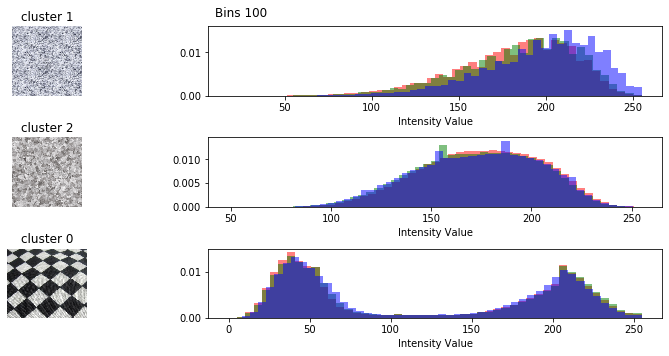

In [8]:
# se obtienen los histogramas para cada canal de cada imagen con su respectiva imagen y el cluset asignado por el modelo
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(12,5))

fig.suptitle('Bins 100')
ax1.imshow(imagenes_train[0])
ax1.axis('off')
ax1.set_title('cluster {}'.format(labels256[0]))

ax2.hist(imagenes_train[0][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax2.hist(imagenes_train[0][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax2.hist(imagenes_train[0][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax2.set_xlabel('Intensity Value')
#ax2.set_title('clase 2')

ax3.imshow(imagenes_train[1])
ax3.axis('off')
ax3.set_title('cluster {}'.format(labels256[1]))

ax4.hist(imagenes_train[1][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax4.hist(imagenes_train[1][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax4.hist(imagenes_train[1][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax4.set_xlabel('Intensity Value')
#ax4.set_title('clase 3')

ax5.imshow(imagenes_train[2])
ax5.axis('off')
ax5.set_title('cluster {}'.format(labels256[2]))

ax6.hist(imagenes_train[2][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax6.hist(imagenes_train[2][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax6.hist(imagenes_train[2][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax6.set_xlabel('Intensity Value')
#ax6.set_title('clase 3')

plt.tight_layout()

plt.show()

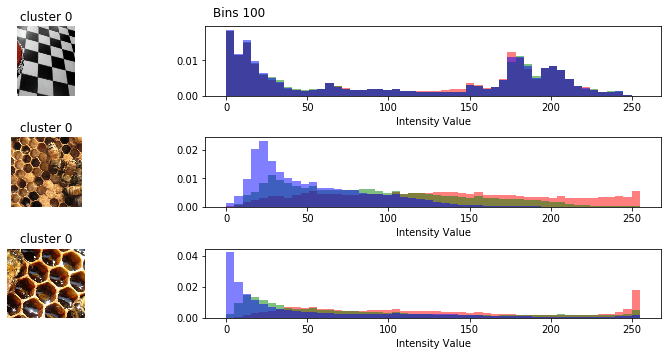

In [9]:
# se obtienen los histogramas para cada canal de cada imagen con su respectiva imagen y el cluset asignado por el modelo
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(12,5))

fig.suptitle('Bins 100')
ax1.imshow(imagenes_train[3])
ax1.axis('off')
ax1.set_title('cluster {}'.format(labels256[3]))

ax2.hist(imagenes_train[3][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax2.hist(imagenes_train[3][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax2.hist(imagenes_train[3][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax2.set_xlabel('Intensity Value')
#ax2.set_title('clase 2')

ax3.imshow(imagenes_train[4])
ax3.axis('off')
ax3.set_title('cluster {}'.format(labels256[4]))

ax4.hist(imagenes_train[4][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax4.hist(imagenes_train[4][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax4.hist(imagenes_train[4][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax4.set_xlabel('Intensity Value')
#ax4.set_title('clase 3')

ax5.imshow(imagenes_train[5])
ax5.axis('off')
ax5.set_title('cluster {}'.format(labels256[5]))

ax6.hist(imagenes_train[5][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax6.hist(imagenes_train[5][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax6.hist(imagenes_train[5][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax6.set_xlabel('Intensity Value')
#ax6.set_title('clase 3')

plt.tight_layout()

plt.show()

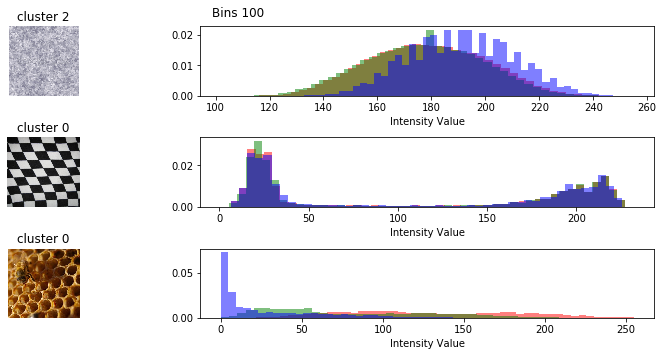

In [10]:
# se obtienen los histogramas para cada canal de cada imagen con su respectiva imagen y el cluset asignado por el modelo
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(12,5))

fig.suptitle('Bins 100')
ax1.imshow(imagenes_valid[0])
ax1.axis('off')
ax1.set_title('cluster {}'.format(predicted_labels[0]))

ax2.hist(imagenes_valid[0][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax2.hist(imagenes_valid[0][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax2.hist(imagenes_valid[0][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax2.set_xlabel('Intensity Value')
#ax2.set_title('clase 2')

ax3.imshow(imagenes_valid[1])
ax3.axis('off')
ax3.set_title('cluster {}'.format(predicted_labels[1]))

ax4.hist(imagenes_valid[1][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax4.hist(imagenes_valid[1][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax4.hist(imagenes_valid[1][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax4.set_xlabel('Intensity Value')
#ax4.set_title('clase 3')

ax5.imshow(imagenes_valid[2])
ax5.axis('off')
ax5.set_title('cluster {}'.format(predicted_labels[2]))

ax6.hist(imagenes_valid[2][:, :, 0].ravel(), bins = 50, color = 'red', alpha = 0.5,density=True )
ax6.hist(imagenes_valid[2][:, :, 1].ravel(), bins = 50, color = 'Green', alpha = 0.5,density=True )
ax6.hist(imagenes_valid[2][:, :, 2].ravel(), bins = 50, color = 'Blue', alpha = 0.5, density=True )
ax6.set_xlabel('Intensity Value')
#ax6.set_title('clase 3')

plt.tight_layout()

plt.show()

In [63]:
#se obtiene la matriz de confusión
#tn, fp, fn, tp = confusion_matrix([0,1,2], predicted_labels).ravel()# verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos
display(confusion_matrix([0,1,2],predicted_labels))
display(accuracy_score([0,1,2], predicted_labels))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

0.0

## Textones

In [12]:
#Cargar los datos
filtros_mat = loadmat('./filterbank.mat')
#imprimir las claves del diccionario .mat
filtros = filtros_mat['filterbank']
print(filtros.shape)
filters = filtros.swapaxes(0,2) # se modifican las dimensiones del banco de filtros
print(filters.shape) 

(49, 49, 18)
(18, 49, 49)


In [13]:
def CalculateFilterResponse_201024204(grayscale_image, filters):
    resp = np.zeros(shape=(grayscale_image.shape[0],grayscale_image.shape[1], filters.shape[0]))
    for i in range(filters.shape[0]):
        resp[:,:,i] = correlate2d(grayscale_image, filters[i,:,:], boundary='symm', mode='same')
    return resp

In [14]:
# prueba de la funcion CalculateFilterResponse_codigo
imagen_test = io.imread(train_paths[0], as_gray= True)
resp_tet = CalculateFilterResponse_201024204(imagen_test, filters)

In [15]:
resp_tet.shape

(640, 640, 18)

In [16]:
def CalculateTextonDictionary_201024204(image_names, filters, k, filename):
    imges_gray = []# se crea una lista para guardar las imagenes en grises
    for img_path in image_names:# se recorren las rutas de las imagenes
        img_gray = io.imread(img_path, as_gray = True)# se leen las iamgenes en escala de grises
        imges_gray.append(img_gray)
    Input_kmeans = []
    for img in imges_gray: # se recorren las imagenes
        response_texton = CalculateFilterResponse_201024204(img, filters)# se obtienen las respuestas a las crosscorrelaciones
        for row in range(response_texton.shape[0]):# se recorren las respuestas para cada filtro en cada imagen
            for column in range(response_texton.shape[1]):
                Input_kmeans.append(response_texton[row,column,:].ravel())# se guardan las respuestas en una lista
    
    Input_kmeans = np.array(Input_kmeans)# se convierte la lista en un array
    
    print('adjusting kmeans....', Input_kmeans.shape)
    model = KMeans(n_clusters = k, random_state = 42).fit(Input_kmeans)# se entrena el modelo kmeans
    print('Kmeans fitted')
    classified_data = model.labels_   # se guardan los cluster asignados para cada imagen  
    centroids = model.cluster_centers_# se obtienen los centroides de cada cluster
    print('centroids shape ', centroids.shape)
    dict_texton = {"Textones": centroids}
    print('Dictionary saved')    
    textonDict = savemat(filename,dict_texton)
    
    return classified_data, centroids

In [17]:
#labels, centroids = CalculateTextonDictionary_201024204(train_paths, filters, 18, 'textonDictionary_201024204.mat')

In [18]:
dict_textons5 = loadmat('textonDictionary_201024204.mat')#Se carga el diccionario de textones
print(dict_textons5.keys())# se imprime la clave del diccionario 
centroids = dict_textons5['Textones']
centroids.shape

dict_keys(['__header__', '__version__', '__globals__', 'Textones'])


(18, 18)

In [40]:
def CalculateTextonHistogram_201024204(grayscale_image, centroids,dist,filters ):
    response_texton = CalculateFilterResponse_201024204(grayscale_image, filters)# se obtiene la crosscorrelacion con los filtros
    histograma_texton = []# se crea una lista para guadar el mapa de textones
    rows, columns = response_texton.shape[0], response_texton.shape[1]# se obtienen el numero de fila y columnas de las imagenes
    for row in range(rows):
        for col in range(columns):
            hist_test = response_texton[row,col,:].ravel()# se obtiene el vector de respuesta para cada pixil
            distances = []# se crea una lista para guardar la etiqueta de cada pixel
            #se declaran las distancias
            if dist == 'intersect':# se calcula la simulitud interseccion
                for index, value in enumerate(centroids):
                    minimos = np.sum(np.minimum(value,hist_test))
                    distances.append(minimos)
                distances = np.array(distances)
                distance = np.argmax(distances)# se asigna el cluster que es mas parecido al pixek
                histograma_texton.append(distance)
            elif dist == 'chi':# se calcula la distancia chi
                for index, value in enumerate(centroids):
                    maximos = np.sum(((value-hist_test)**2)/(value+hist_test))
                    distances.append(maximos)
                distances = np.array(distances)
                distance = np.argmin(distances)# se asigna el cluster que esta menos alejado del pixel
                histograma_texton.append(distance)
            else:# se calcula la distancia divergencia
                for index, value in enumerate(centroids):
                    maximos = np.sum((value-hist_test)*np.log(value/hist_test))
                    distances.append(maximos)   
                distances = np.array(distances)
                distance = np.argmin(distances)# se asigna el cluster que está menos alejado del pixel
                histograma_texton.append(distance)
    plt.figure(1)
    histogram_text,_,_ = plt.hist(np.array(histograma_texton), centroids.shape[0])
    plt.close()
    return histogram_text

In [50]:
def assign_class(value):
    '''esta funciona asigna la clase'''
    if value <2:# si se parece a las dos primeras imagenes, se asigna a la clase 0
        assign = 0
    elif 2<=value<4:# si se parece a las dos segundas imagenes, se asigna a la clase 1
        assign = 1
    else:# si se parece a las ultimas imagenes, se asigna a la clase 2
        assign = 2
    return assign

In [48]:
def PredictClass_201024204(grayscale_image, filters, train_hists,centroids, dist, nn_dist):
    # se obtiene el histograma de textones para la imagen de validacion
    hist_valid = CalculateTextonHistogram_201024204(grayscale_image, centroids,dist,filters)
    label = []
    # se aplica la distancia que entra por parametro
    if nn_dist == 'intersect':
        for index, value in enumerate(train_hists):
            minimos = np.sum(np.minimum(value,hist_valid))
            label.append(minimos)
        label = np.argmax(np.array(label))
    elif nn_dist == 'chi':
        for index, value in enumerate(train_hists):
            maximos = np.sum(((value-hist_valid)**2)/(value+hist_valid))
            label.append(maximos)
        label = np.argmin(np.array(label))
    else:
        for index, value in enumerate(train_hists):
            maximos = np.sum((value-hist_valid)*np.log(value/hist_valid))
            label.append(maximos)   
        label = np.argmin(np.array(label))
    return assign_class(label)

In [38]:
# se generan los histogramas de entrenamiento
histogram_chi = []
for file_train in train_paths:
    img_gray_train = io.imread(file_train,as_gray= True)
    histograma_centroids_chi = CalculateTextonHistogram_201024204(img_gray_train, centroids,'chi')
    histogram_chi.append(histograma_centroids_chi)
    
histogram_train_chi = np.array(histogram_chi)

In [51]:
# se obtienen las clasificaciones para las imagenes de validacion
prediciones = []
for file_valid in valid_paths:
    img_gray_valid = io.imread(file_valid,as_gray= True)
    pred = PredictClass_201024204(img_gray_valid, filters, histogram_train_chi,centroids, 'chi', 'chi')
    prediciones.append(pred)
    
prediciones = np.array(prediciones)

In [53]:
prediciones

array([0, 2, 1])

In [56]:
ACA = accuracy_score([0,1,2], prediciones)
print('el aca obtenido por medio de textones fue de: ',ACA)

0.3333333333333333

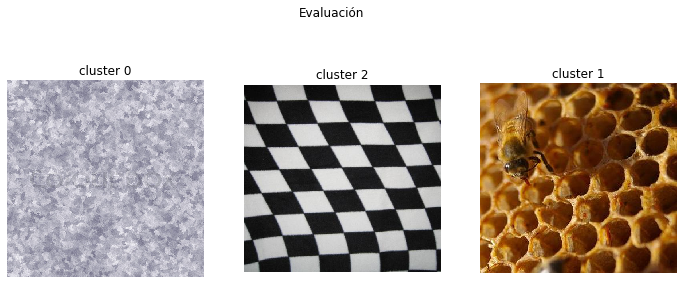

In [64]:
# se grafican las imagenes de validacion con su respectiva prediccion
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

fig.suptitle('Evaluación')
ax1.imshow(imagenes_valid[0])
ax1.axis('off')
ax1.set_title('cluster {}'.format(prediciones[0]))


ax2.imshow(imagenes_valid[1])
ax2.axis('off')
ax2.set_title('cluster {}'.format(prediciones[1]))


ax3.imshow(imagenes_valid[2])
ax3.axis('off')
ax3.set_title('cluster {}'.format(prediciones[2]))

plt.show()